### Q. Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

## 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

import statsmodels.formula.api as smf

## 2. Import data Or Data Collection

In [2]:
toyota_corolla_data = pd.read_csv(r"E:\Data Science by John\Assignments\Assignment 5- Multi Linear Regression\ToyotaCorolla.csv",encoding='latin1')
toyota_corolla_data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


## 3. Data Preparation

In [3]:
toyota_corolla_data_req = toyota_corolla_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyota_corolla_data_req

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


## 4. Data Understanding

### 4.1 Perform Initial Analysis

In [4]:
toyota_corolla_data_req.shape

(1436, 9)

In [5]:
toyota_corolla_data_req.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [6]:
toyota_corolla_data_req.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
toyota_corolla_data_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
toyota_corolla_data_req.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

## 4.2 Assumptions Check

### 1. Linearity Check

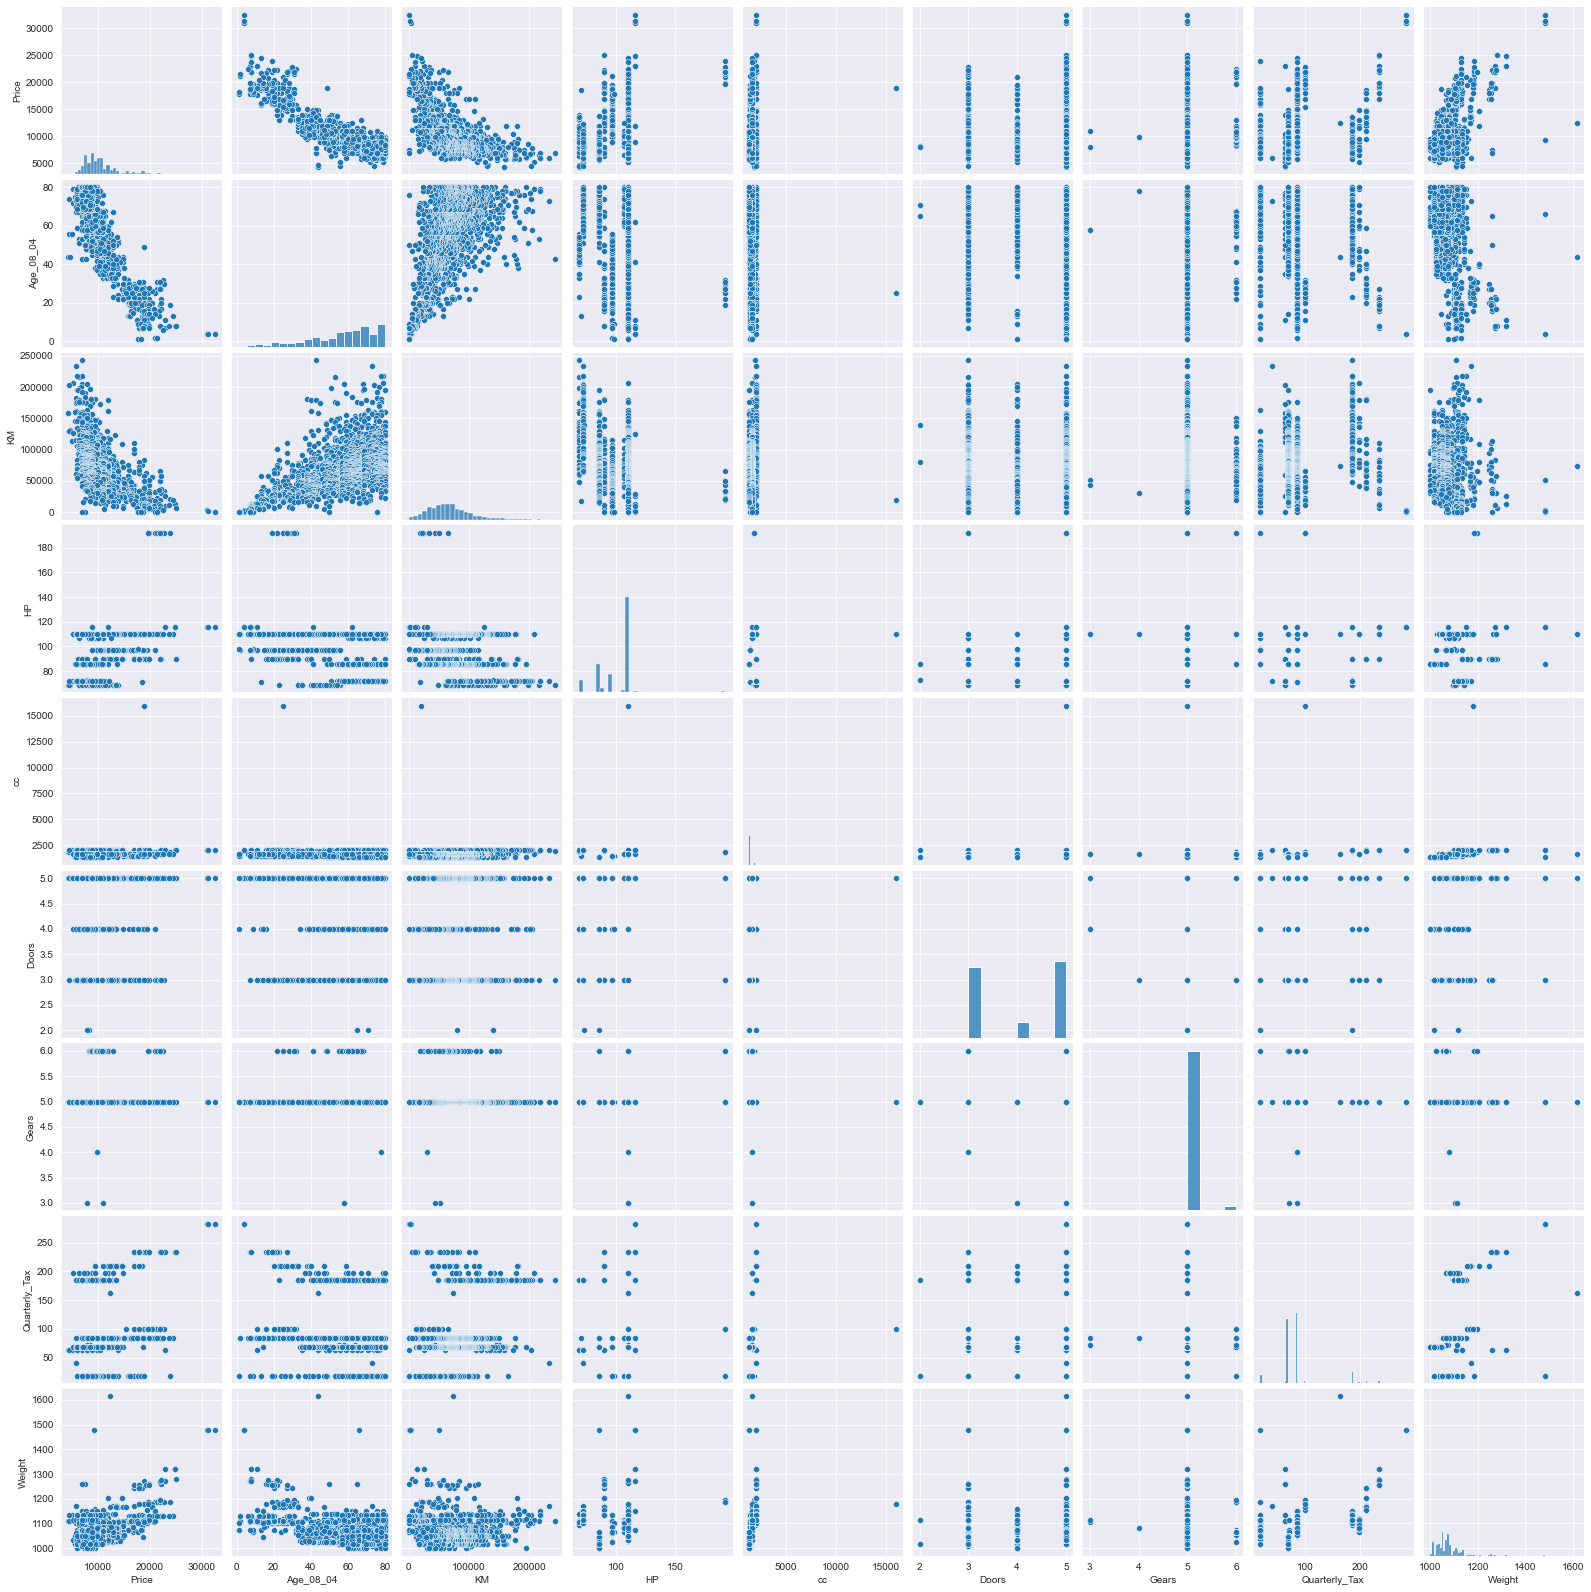

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota_corolla_data_req)
plt.show()

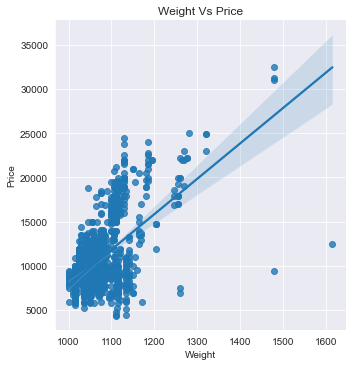

In [12]:
sns.lmplot(x="Weight", y="Price", data=toyota_corolla_data_req)
plt.title("Weight Vs Price")
plt.show()

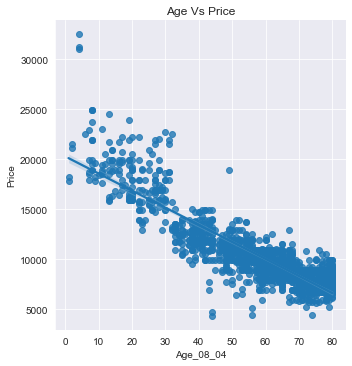

In [13]:
sns.lmplot(x="Age_08_04", y="Price", data=toyota_corolla_data_req)
plt.title("Age Vs Price")
plt.show()

### Linearity Test is Failed

### 2. Normality Test

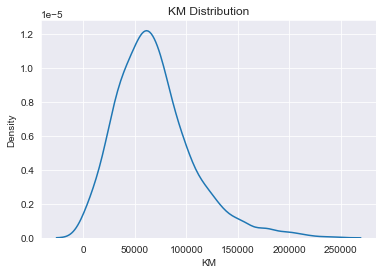

In [14]:
sns.kdeplot(data = toyota_corolla_data_req, x='KM')
plt.title('KM Distribution')
plt.show()

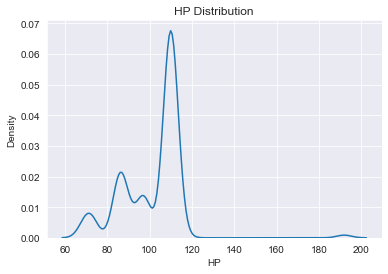

In [15]:
sns.kdeplot(x=toyota_corolla_data_req['HP'])
plt.title('HP Distribution')
plt.show()

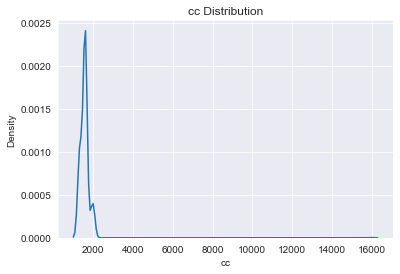

In [16]:
sns.kdeplot(x=toyota_corolla_data_req['cc'])
plt.title('cc Distribution')
plt.show()

### Normality Test is Failed

### 3. No AutoRegression : No any feature is in DataTime data format so this test is passed

### 4. Multicollinearity

### Correlation Matrix

In [17]:
corr_matrix = toyota_corolla_data_req.corr().round(2)
corr_matrix

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.00,-0.88,-0.57,0.31,0.13,0.19,0.06,0.22,0.58
Age_08_04,-0.88,1.00,0.51,-0.16,-0.10,-0.15,-0.01,-0.20,-0.47
KM,-0.57,0.51,1.00,-0.33,0.10,-0.04,0.02,0.28,-0.03
HP,0.31,-0.16,-0.33,1.00,0.04,0.09,0.21,-0.30,0.09
cc,0.13,-0.10,0.10,0.04,1.00,0.08,0.01,0.31,0.34
Doors,0.19,-0.15,-0.04,0.09,0.08,1.00,-0.16,0.11,0.30
Gears,0.06,-0.01,0.02,0.21,0.01,-0.16,1.00,-0.01,0.02
Quarterly_Tax,0.22,-0.20,0.28,-0.30,0.31,0.11,-0.01,1.00,0.63
Weight,0.58,-0.47,-0.03,0.09,0.34,0.30,0.02,0.63,1.00


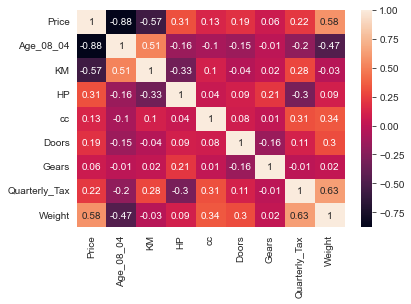

In [18]:
sns.heatmap(data = corr_matrix,annot = True)
plt.show()

### MultiCollinearity Test is Passed
There is very less multicollinearity in the inputs in our data. 

### 5. Homoscedasticity Check II 6. Zero Residual Check
This will be performed post Model Training beacuse we need the errors

## 5. Model Building

In [19]:
x = toyota_corolla_data_req.drop("Price",axis=1)
y = toyota_corolla_data_req[["Price"]]

##  6. Model Training

In [20]:
linear_model = LinearRegression()

In [21]:
linear_model.fit(x,y)

LinearRegression()

In [22]:
linear_model.coef_

array([[-1.21658402e+02, -2.08171292e-02,  3.16809058e+01,
        -1.21100301e-01, -1.61664095e+00,  5.94319936e+02,
         3.94908076e+00,  1.69586318e+01]])

In [23]:
linear_model.intercept_

array([-5573.10635791])

## 7. Model Testing

In [24]:
y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


In [25]:
y_pred = linear_model.predict(x)
y_pred

array([[16812.58050518],
       [16272.35518581],
       [16800.73245987],
       ...,
       [ 8454.29800682],
       [ 8578.03812148],
       [10402.43833285]])

## 8. Model Evaluation

In [26]:
error = y - y_pred
error

,Price
0,-3312.580505
1,-2522.355186
2,-2850.732460
3,-1476.496731
4,-2472.419010
...,...
1431,-1293.758297
1432,2553.661579
1433,45.701993
1434,-1328.038121


## .....back to Assumption Check

## 5. Homoscedasticity Check

In [27]:
x

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [28]:
std_scaler = StandardScaler()
scaled_x = std_scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x,columns=['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])
scaled_x.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,-1.771966,-0.574695,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
1,-1.771966,0.117454,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
2,-1.718184,-0.715386,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
3,-1.610620,-0.547650,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.758561
4,-1.395491,-0.801028,-0.768042,0.997419,-1.085139,-0.140425,2.98868,1.853577


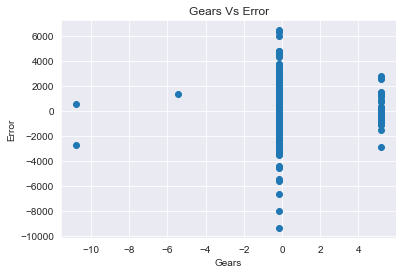

In [29]:
plt.scatter(x=scaled_x['Gears'],y=error)
plt.title('Gears Vs Error')
plt.xlabel('Gears')
plt.ylabel('Error')
plt.show()

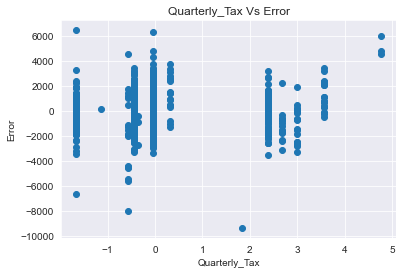

In [30]:
plt.scatter(x=scaled_x['Quarterly_Tax'],y=error)
plt.title('Quarterly_Tax Vs Error')
plt.xlabel('Quarterly_Tax')
plt.ylabel('Error')
plt.show()

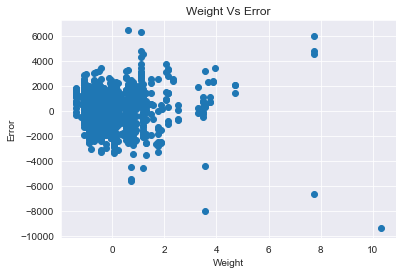

In [31]:
plt.scatter(x=scaled_x['Weight'],y=error)
plt.title('Weight Vs Error')
plt.xlabel('Weight')
plt.ylabel('Error')
plt.show()

### Homoscedasticity Test is Failed

## 6. Zero Residual Mean Across the Fitted Line

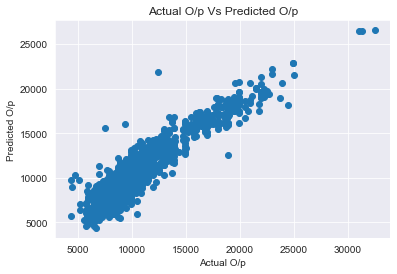

In [32]:
plt.scatter(x=y,y=y_pred)
plt.title('Actual O/p Vs Predicted O/p')
plt.xlabel('Actual O/p')
plt.ylabel('Predicted O/p')
plt.show()

### Zero Residual Mean Test is also Failed

# Build Linear Regression using StatsModels 

In [33]:
toyota_corolla_data_req.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [34]:
linear_model_stats = smf.ols('Price~Q("Age_08_04")+KM+HP+cc+Doors+Gears+Q("Quarterly_Tax")+Weight',data = toyota_corolla_data_req).fit()

## 8.1 Evaluation Metrics of Linear Regression

In [35]:
print('R2Score     :',linear_model_stats.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats.aic.round(4))
print('BIC Value   :',linear_model_stats.bic.round(4))
print('P-Value     :\n',linear_model_stats.pvalues)

R2Score     : 0.8638
Adj.R2Score : 0.863
AIC Value   : 24769.0766
BIC Value   : 24816.5032
P-Value     :
 Intercept              8.241949e-05
Q("Age_08_04")        3.354724e-288
KM                     7.538439e-57
HP                     3.757218e-28
cc                     1.790902e-01
Doors                  9.677716e-01
Gears                  2.606549e-03
Q("Quarterly_Tax")     2.619148e-03
Weight                 2.048576e-52
dtype: float64


In [37]:
linear_model_stats_1 = smf.ols('Price~Q("Age_08_04")+KM+HP+cc',data = toyota_corolla_data_req).fit()
print('R2Score     :',linear_model_stats_1.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats_1.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_1.aic.round(4))
print('BIC Value   :',linear_model_stats_1.bic.round(4))
print('P-Value     :\n',linear_model_stats_1.pvalues)

R2Score     : 0.8135
Adj.R2Score : 0.813
AIC Value   : 25211.8665
BIC Value   : 25238.2146
P-Value     :
 Intercept         2.864486e-250
Q("Age_08_04")     0.000000e+00
KM                 3.392364e-20
HP                 5.660367e-32
cc                 7.621272e-07
dtype: float64


In [38]:
linear_model_stats_2 = smf.ols('Price~Doors+Gears+Q("Quarterly_Tax")+Weight',data = toyota_corolla_data_req).fit()
print('R2Score     :',linear_model_stats_2.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats_2.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_2.aic.round(4))
print('BIC Value   :',linear_model_stats_2.bic.round(4))
print('P-Value     :\n',linear_model_stats_2.pvalues)

R2Score     : 0.3744
Adj.R2Score : 0.3727
AIC Value   : 26949.9281
BIC Value   : 26976.2762
P-Value     :
 Intercept              1.388159e-58
Doors                  9.294941e-01
Gears                  2.900447e-02
Q("Quarterly_Tax")     4.798122e-18
Weight                4.552951e-121
dtype: float64


In [39]:
linear_model_stats_3 = smf.ols('Price~KM+HP+cc+Doors+Gears+Q("Quarterly_Tax")+Weight',data = toyota_corolla_data_req).fit()
print('R2Score     :',linear_model_stats_3.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats_3.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_3.aic.round(4))
print('BIC Value   :',linear_model_stats_3.bic.round(4))
print('P-Value     :\n',linear_model_stats_3.pvalues)

R2Score     : 0.6572
Adj.R2Score : 0.6555
AIC Value   : 26092.0394
BIC Value   : 26134.1963
P-Value     :
 Intercept              3.195287e-43
KM                    8.359303e-167
HP                     3.738120e-09
cc                     2.322594e-01
Doors                  9.472273e-01
Gears                  1.643195e-02
Q("Quarterly_Tax")     5.278916e-05
Weight                 2.005482e-91
dtype: float64


In [40]:
linear_model_stats_4 = smf.ols('Price~KM+HP+cc+Doors+Gears+Q("Quarterly_Tax")',data = toyota_corolla_data_req).fit()
print('R2Score     :',linear_model_stats_4.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats_4.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_4.aic.round(4))
print('BIC Value   :',linear_model_stats_4.bic.round(4))
print('P-Value     :\n',linear_model_stats_4.pvalues)

R2Score     : 0.5428
Adj.R2Score : 0.5409
AIC Value   : 26503.6876
BIC Value   : 26540.5749
P-Value     :
 Intercept              9.055033e-01
KM                    2.728211e-168
HP                     1.943460e-25
cc                     3.340648e-02
Doors                  9.763035e-08
Gears                  1.792430e-02
Q("Quarterly_Tax")     2.679481e-87
dtype: float64


In [41]:
mean_squared_error(y,y_pred)

1790935.608390293

In [42]:
mean_absolute_error(y,y_pred)

1001.5466325182533

## 9. MODEL OPTIMIZATION

In [43]:
toyota_corolla_data_req_2 = toyota_corolla_data_req.copy()
toyota_corolla_data_req_2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [44]:
toyota_corolla_data_req_2['log_Age_08_04']    = np.log(toyota_corolla_data_req_2['Age_08_04'])
toyota_corolla_data_req_2['log_KM']           = np.log(toyota_corolla_data_req_2['KM'])
toyota_corolla_data_req_2['log_HP']           = np.log(toyota_corolla_data_req_2['HP'])
toyota_corolla_data_req_2['log_cc']           = np.log(toyota_corolla_data_req_2['cc'])
toyota_corolla_data_req_2['log_Doors']        = np.log(toyota_corolla_data_req_2['Doors'])
toyota_corolla_data_req_2['log_Gears']        = np.log(toyota_corolla_data_req_2['Gears'])
toyota_corolla_data_req_2['log_Quarterly_Tax']= np.log(toyota_corolla_data_req_2['Quarterly_Tax'])
toyota_corolla_data_req_2['log_Weight']       = np.log(toyota_corolla_data_req_2['Weight'])
toyota_corolla_data_req_2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,log_Age_08_04,log_KM,log_HP,log_cc,log_Doors,log_Gears,log_Quarterly_Tax,log_Weight
0,13500,23,46986,90,2000,3,5,210,1165,3.135494,10.757605,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
1,13750,23,72937,90,2000,3,5,210,1165,3.135494,11.197351,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
2,13950,24,41711,90,2000,3,5,210,1165,3.178054,10.638520,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
3,14950,26,48000,90,2000,3,5,210,1165,3.258097,10.778956,4.49981,7.600902,1.098612,1.609438,5.347108,7.060476
4,13750,30,38500,90,2000,3,5,210,1170,3.401197,10.558414,4.49981,7.600902,1.098612,1.609438,5.347108,7.064759


## 3.2 Assumptions Check

### 1. Linearity Check

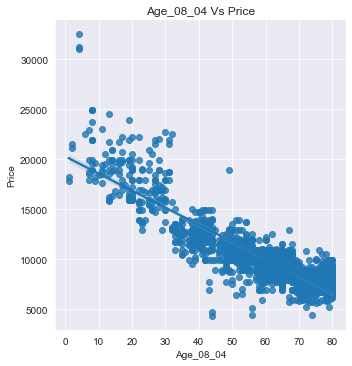

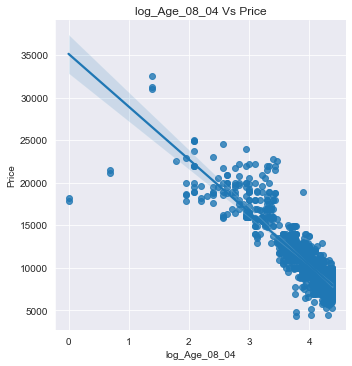

In [45]:
sns.lmplot(x="Age_08_04", y="Price", data=toyota_corolla_data_req_2)
plt.title("Age_08_04 Vs Price")

sns.lmplot(x="log_Age_08_04", y="Price", data=toyota_corolla_data_req_2)
plt.title("log_Age_08_04 Vs Price")
plt.show()

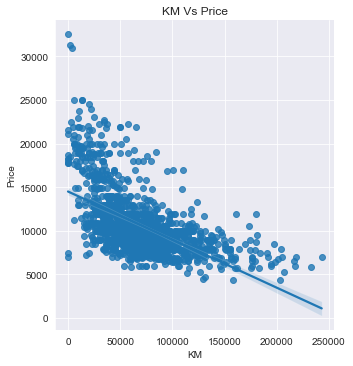

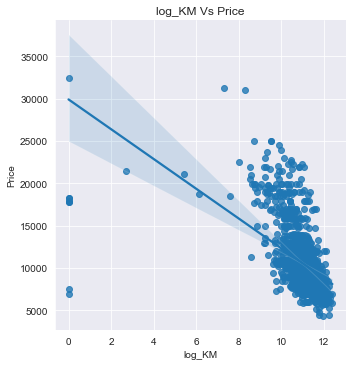

In [46]:
sns.lmplot(x="KM", y="Price", data=toyota_corolla_data_req_2)
plt.title("KM Vs Price")

sns.lmplot(x="log_KM", y="Price", data=toyota_corolla_data_req_2)
plt.title("log_KM Vs Price")
plt.show()

### Linearity Test is Failed

### 2. Normality Test

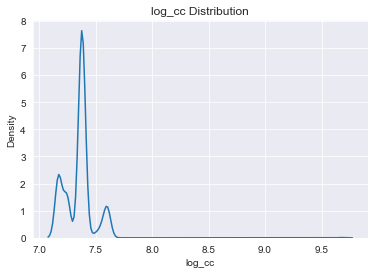

In [47]:
sns.kdeplot(data = toyota_corolla_data_req_2, x='log_cc')
plt.title('log_cc Distribution')
plt.show()

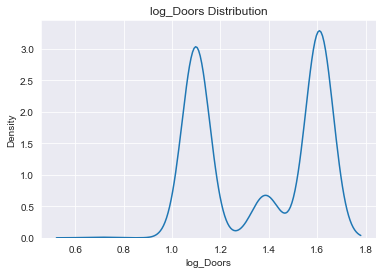

In [48]:
sns.kdeplot(data = toyota_corolla_data_req_2, x='log_Doors')
plt.title('log_Doors Distribution')
plt.show()

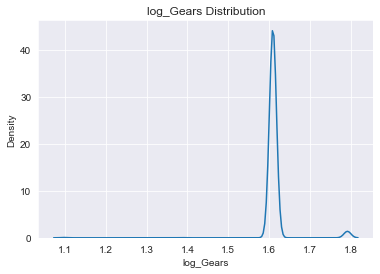

In [49]:
sns.kdeplot(data = toyota_corolla_data_req_2, x='log_Gears')
plt.title('log_Gears Distribution')
plt.show()

### Normality Test is Failed

## Model Building || Training || Evaluation using Statsmodels

In [50]:
linear_model_stats_5 = smf.ols('Price~Q("log_Age_08_04")+log_KM+log_HP+log_cc+log_Doors+log_Gears+Q("log_Quarterly_Tax")+log_Weight',data = toyota_corolla_data_req_2).fit()
print('R2Score     :',linear_model_stats_5.rsquared.round(4))
print('Adj.R2Score :',linear_model_stats_5.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_5.aic.round(4))
print('BIC Value   :',linear_model_stats_5.bic.round(4))
print('P-Value     :\n',linear_model_stats_5.pvalues)

R2Score     : 0.8353
Adj.R2Score : 0.8344
AIC Value   : 25041.7317
BIC Value   : 25089.1583
P-Value     :
 Intercept                  3.285177e-34
Q("log_Age_08_04")        4.827085e-288
log_KM                     3.236391e-03
log_HP                     3.608349e-60
log_cc                     3.790066e-13
log_Doors                  1.887446e-01
log_Gears                  6.939977e-03
Q("log_Quarterly_Tax")     2.385309e-06
log_Weight                 6.221465e-39
dtype: float64


### After transformation model performance is not so good.

## 10. Model Finalization & Model Testing

In [51]:
y.head()

,Price
0,13500
1,13750
2,13950
3,14950
4,13750


In [53]:
X_test = pd.DataFrame(data=toyota_corolla_data_req.drop(["Price"],axis=1))
X_test.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [54]:
y_pred_stat_3 = linear_model_stats.predict(X_test)
y_pred_stat_3.head()

0    16812.580505
1    16272.355186
2    16800.732460
3    16426.496731
4    16222.419010
dtype: float64

## ********************THE END************************